## Try 7.7.1: Exploring the customer churn dataset.

**The Python code below imports the customer churn dataset, and explores the data using tables and plots.**
* **Click the double-right arrow to restart the kernel and run all cells.**
* **Examine the code below.**

In [1]:
# Import and view the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customer_churn = pd.read_csv('customer_churn.csv')
customer_churn.groupby(by='churn').size()

churn
0    7963
1    2037
dtype: int64

In [2]:
customer_churn

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Visualize the impact on customer churn by other features

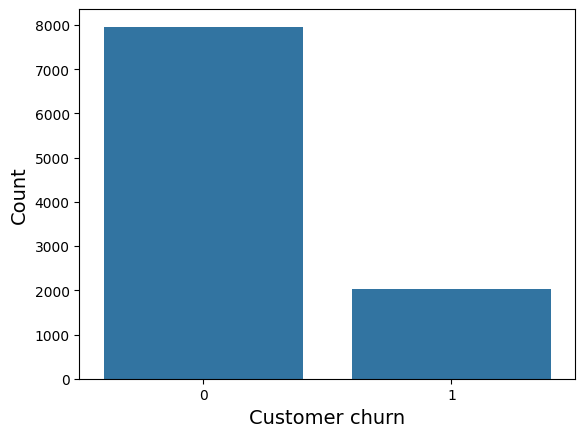

In [3]:
p = sns.countplot(data=customer_churn, x='churn')
p.set_xlabel('Customer churn', fontsize=14)
p.set_ylabel('Count', fontsize=14)
plt.show()

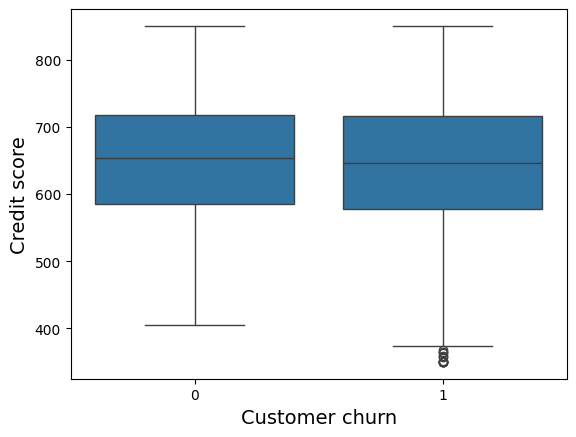

In [4]:
p = sns.boxplot(data=customer_churn, x='churn', y='credit_score')
p.set_ylabel('Credit score', fontsize=14)
p.set_xlabel('Customer churn', fontsize=14)
plt.show()

KeyboardInterrupt: 

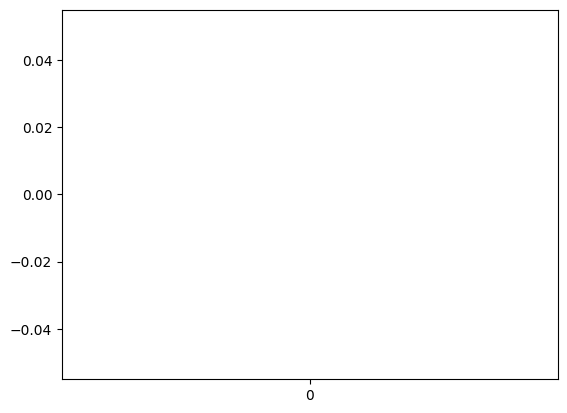

In [5]:
p = sns.boxplot(data=customer_churn, x='churn', y='tenure')
p.set_ylabel('Tenure', fontsize=14)
p.set_xlabel('Customer churn', fontsize=14)
plt.show()

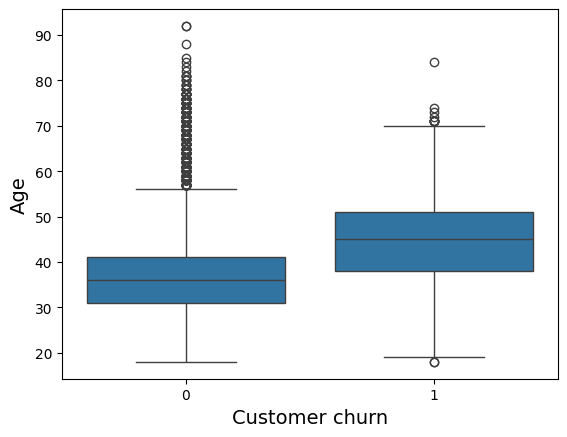

In [6]:
p = sns.boxplot(data=customer_churn, x='churn', y='age')
p.set_ylabel('Age', fontsize=14)
p.set_xlabel('Customer churn', fontsize=14)
plt.show()

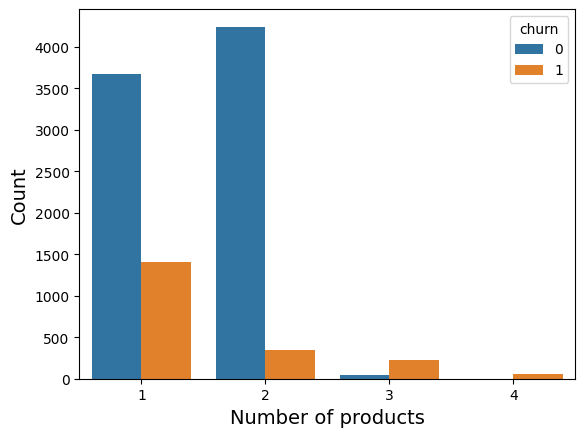

In [7]:
p = sns.countplot(data=customer_churn, x='products_number', hue='churn')
p.set_xlabel('Number of products', fontsize=14)
p.set_ylabel('Count', fontsize=14)
plt.show()

**Try 7.7.2: Logistic regression model for customer churn.**


**The Python code below imports the customer churn dataset and fits a logistic regression model using age as the input feature.**
* **Click the double-right arrow to restart the kernel and run all cells.**
* **Examine the code below.**
* **Try changing the input feature to credit score or account balance. How does the logistic regression model change?**

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
customer_churn

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


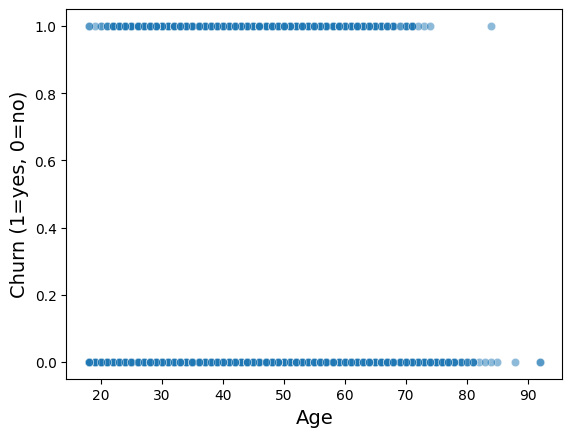

In [10]:
p = sns.scatterplot(data=customer_churn, x='age', y='churn', alpha=0.5)
p.set_xlabel('Age', fontsize=14)
p.set_ylabel('Churn (1=yes, 0=no)', fontsize=14)
plt.show()

In [11]:
# Fit regression model and print coefficients
X = customer_churn[['age']].values.reshape(-1, 1)
y = customer_churn[['churn']].values.reshape(-1, 1).astype(int)

logisticModel = LogisticRegression()
logisticModel.fit(X, np.ravel(y.astype(int)))

print('Slope coefficient:', logisticModel.coef_)
print('Intercept coefficient:', logisticModel.intercept_)

Slope coefficient: [[0.06294475]]
Intercept coefficient: [-3.92860441]


RuntimeError: `logistic=True` requires statsmodels, an optional dependency, to be installed.

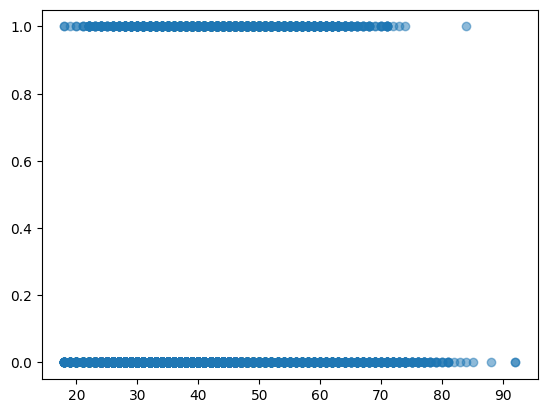

In [17]:
# Plot fitted logistic regression model
p = sns.regplot(
    data=customer_churn,
    x='age',
    y='churn',
    logistic=True,
    ci=True,
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'black'},
)
p.set_xlabel('Age', fontsize=14)
p.set_ylabel('Churn (1=yes, 0=no)', fontsize=14)
plt.show()

In [18]:
logisticModel.predict_proba([[25]])

array([[0.91332971, 0.08667029]])

## Try 7.7.3: Multiple logistic regression model for customer churn.

**The Python code below imports the customer churn dataset and fits a multiple logistic regression model using account balance, age, and credit score.**
* **Click the double-right arrow to restart the kernel and run all cells.**
* **Examine the code below.**

In [5]:
# Fit regression model and print coefficients
X = customer_churn[['age','balance','credit_score']]
y = customer_churn[['churn']].values.reshape(-1, 1).astype(int)

logisticModel = LogisticRegression()
logisticModel.fit(X, np.ravel(y.astype(int)))

print('Slope coefficient:', logisticModel.coef_)
print('Intercept coefficient:', logisticModel.intercept_)

Slope coefficient: [[ 6.33785909e-02  5.03279842e-06 -7.71529759e-04]]
Intercept coefficient: [-3.86114781]


In [11]:
logisticModel.predict_proba([[59,163807.86,408]])

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.40424296, 0.59575704]])